In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data from the CSV file
df = pd.read_csv('modified5050_card_transdata.csv')

fraud_count = df[df['fraud'] != 0].shape[0]
print(f"Fraud Count {fraud_count}")

length_before = df.shape[0]
print(f"Length {length_before}")

df.tail()

Fraud Count 87403
Length 174805


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
174800,4.421777,566.926046,2.093019,1,1,1,1,0
174801,39.628811,6.900791,0.226182,1,0,0,0,0
174802,9.027388,0.067260,1.744743,1,1,0,1,0
174803,2.177936,0.212883,2.001168,1,0,0,0,0
174804,24.709860,28.943255,1.962611,1,0,0,0,0


In [3]:
## drop duplicates

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

length_after = df.shape[0]

print(f"The length before {length_before} length after {length_after}")

Duplicated values dropped succesfully
The length before 174805 length after 174805


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(["fraud"], axis=1)
y = df["fraud"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
len(X_val) + len(X_train) + len(X_test)

174805

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=7))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.summary()

'''
model = tf.keras.Sequential(
    [
        # Adjusted number of neurons
        tf.keras.layers.Dense(128, activation="relu", input_shape=(X.shape[-1],),
                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate
        tf.keras.layers.Dense(64, activation="relu",
                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()
'''

2024-04-20 15:36:42.024180: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 15:36:43.041873: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/corey/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-20 15:36:43.827796: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node ze

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

'\nmodel = tf.keras.Sequential(\n    [\n        # Adjusted number of neurons\n        tf.keras.layers.Dense(128, activation="relu", input_shape=(X.shape[-1],),\n                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization\n        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate\n        tf.keras.layers.Dense(64, activation="relu",\n                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization\n        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate\n        tf.keras.layers.Dense(1, activation="sigmoid"),\n    ]\n)\nmodel.summary()\n'

In [7]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# configure early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# calculate class weights
neg, pos = np.bincount(y_train)
total = neg + pos
class_weight = {0: 1, 1: 5}

# train the model
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[es])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 3s 926us/step - accuracy: 0.8704 - loss: 0.3854 - val_accuracy: 0.9682 - val_loss: 0.1113
Epoch 2/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.9644 - loss: 0.1186 - val_accuracy: 0.9735 - val_loss: 0.0814
Epoch 3/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.9688 - loss: 0.0890 - val_accuracy: 0.9769 - val_loss: 0.0671
Epoch 4/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.9724 - loss: 0.0763 - val_accuracy: 0.9793 - val_loss: 0.0599
Epoch 5/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.9773 - loss: 0.0650 - val_accuracy: 0.9815 - val_loss: 0.0537
Epoch 6/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.9772 - loss: 0.0626 - val_accuracy: 0.9838 - val_loss: 0.0475
Epoch 7/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.9787 - loss: 0.0569 - val_accuracy: 0.9850 - val_loss: 0.0434
Epoch 8/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 

2459/2459 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9956 - loss: 0.0134 - val_accuracy: 0.9969 - val_loss: 0.0084
Epoch 51/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9968 - val_loss: 0.0087
Epoch 52/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9954 - loss: 0.0135 - val_accuracy: 0.9971 - val_loss: 0.0080
Epoch 53/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9956 - loss: 0.0129 - val_accuracy: 0.9976 - val_loss: 0.0073
Epoch 54/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9973 - val_loss: 0.0077
Epoch 55/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9951 - loss: 0.0131 - val_accuracy: 0.9976 - val_loss: 0.0072
Epoch 56/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 0.9978 - val_loss: 0.0070
Epoch 57/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9955 - loss: 0.0126

2459/2459 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9977 - loss: 0.0068 - val_accuracy: 0.9986 - val_loss: 0.0037
Epoch 100/100
2459/2459 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9977 - loss: 0.0069 - val_accuracy: 0.9984 - val_loss: 0.0042


[]

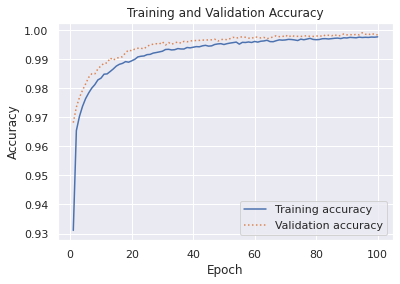

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


acc = history.history["accuracy"]
val = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

2186/2186 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step


Text(89.18, 0.5, 'Actual label')

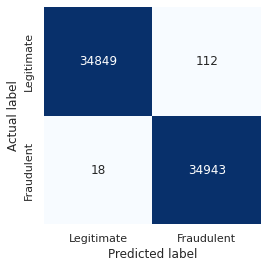

In [9]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [10]:
true_legitimate = 0
true_fraudulent = 0
false_legitimate = 0
false_fraudulent = 0

for i in range(0, len(y_predicted)):
    if y_predicted[i] and y_test.iloc[i]:
        true_fraudulent+=1
    elif y_predicted[i] and (not y_test.iloc[i]):
        false_fraudulent+=1
    elif (not y_predicted[i]) and y_test.iloc[i]:
        false_legitimate+=1
    elif (not y_predicted[i]) and (not y_test.iloc[i]):
        true_legitimate+=1
        

true_legitimate

34849

In [11]:
print('true legitimate: ' + str(true_legitimate))
print('true fraudulent: ' + str(true_fraudulent))
print('false legitimate: ' + str(false_legitimate))
print('false fraudulent: ' + str(false_fraudulent))

true legitimate: 34849
true fraudulent: 34943
false legitimate: 18
false fraudulent: 112


In [12]:
test_acc = (true_legitimate + true_fraudulent)/len(y_test)
print(test_acc)

0.9981407854466405
